In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rd
from math import sqrt
import ipytest as ipy
import pytest as pt
from collections import Counter
ipy.autoconfig()

In [23]:
def symmetric_random_walk(m: int, n: int):
    matrix = rd.binomial(1, p=0.5, size=(m, n))
    matrix = np.where(matrix==0, -1, matrix)
    matrix[:, 0] = 0
    matrix = np.cumsum(matrix, axis=1)
    return matrix

M = symmetric_random_walk(3, 11)

In [24]:
%%ipytest

def test_symmetric_random_walk():
    rw = symmetric_random_walk(1, 10)
    assert rw.shape == (1,10)

    rw = symmetric_random_walk(1, 100)
    assert set(np.diff(rw[0])) == {-1, 1}

    rw = symmetric_random_walk(100, 1000)
    assert (rw[:, 0]==0).all()

try: test_symmetric_random_walk()
except AssertionError: print('test failed')
    

.                                                                                            [100%]
1 passed in 0.01s


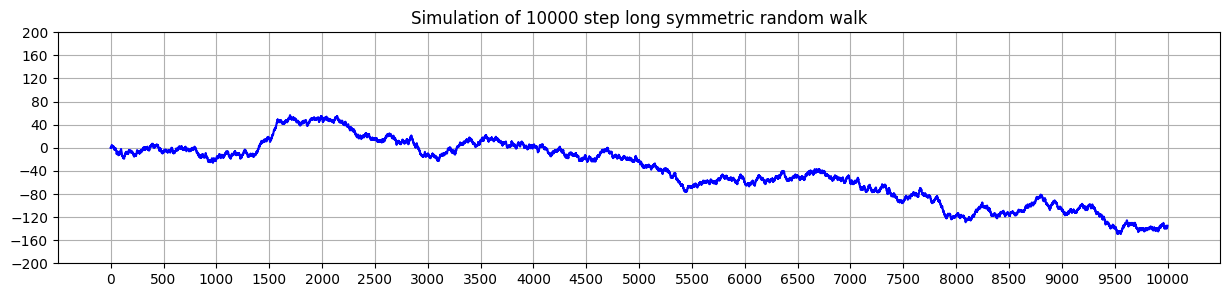

In [25]:
m = 1
n = 10000

i = 0
while i < m:
    plt.figure(figsize=(15, 3))
    xs = np.linspace(0, n, n)
    ys = symmetric_random_walk(m, n)[i]
    plt.plot(xs, ys, c='b')
    plt.yticks([y for y in range(-int(2*sqrt(n)), int(2*sqrt(n)+40), 40)])
    plt.xticks([x for x in range(0, n + n//20, n//20)])
    plt.title(f"Simulation of {n} step long symmetric random walk")
    plt.grid()
    plt.show()
    i += 1

In [26]:
def last_zero_index(m: int, n: int):
    M = symmetric_random_walk(m, n)
    lst = []
    for i in range(m):
        lst.append(np.where(M[i]==0)[0].max() /n)
    lst.sort()
    return lst

last_zero_index(11, 1000)


[0.0, 0.004, 0.02, 0.03, 0.302, 0.318, 0.376, 0.634, 0.878, 0.934, 0.946]

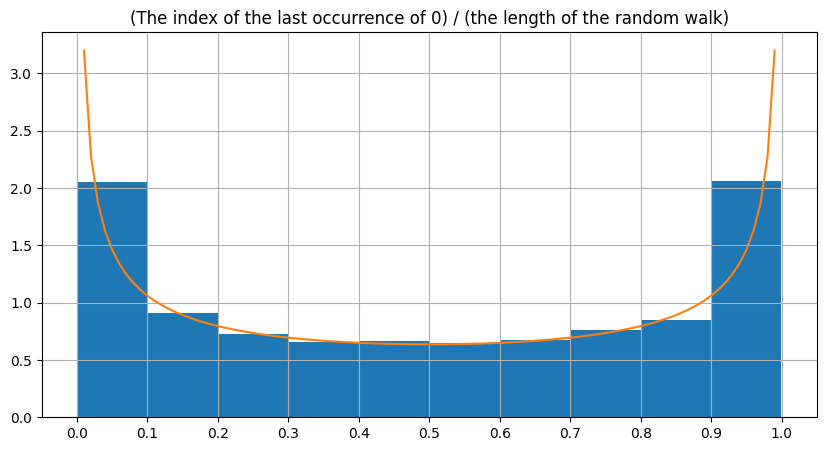

In [33]:
m = 10000
n = 10000

plt.figure(figsize=(10, 5))
plt.hist(last_zero_index(m, n), density=True)
plt.xticks([round(x, 1) for x in list(np.linspace(0, 1, num=11))])
xs = np.linspace(0.01, 0.99, 100)
ys = [1/np.pi * 1/( sqrt( (x) * (1-(x)) ) ) for x in xs]
plt.plot(xs, ys)
plt.title(f"(The index of the last occurrence of 0) / (the length of the random walk)")
plt.grid()
plt.show()

In [37]:
def first_zero_index(m: int, n: int):
    M = symmetric_random_walk(m, n)
    M[:, 0] = 1
    M[:,-1] = 0
    lst = []
    for i in range(m):
        if np.where(M[i]==0)[0].min():
            lst.append(np.where(M[i]==0)[0].min())
    lst.sort()
    return list(Counter(lst))

first_zero_index(100, 10000)

#for i in first_zero_index(10, 10000):
#    print(i)

[2,
 4,
 6,
 8,
 10,
 16,
 20,
 24,
 26,
 34,
 36,
 38,
 52,
 56,
 58,
 74,
 110,
 116,
 164,
 324,
 486,
 1312,
 1326,
 1682,
 1984,
 2166,
 9999]

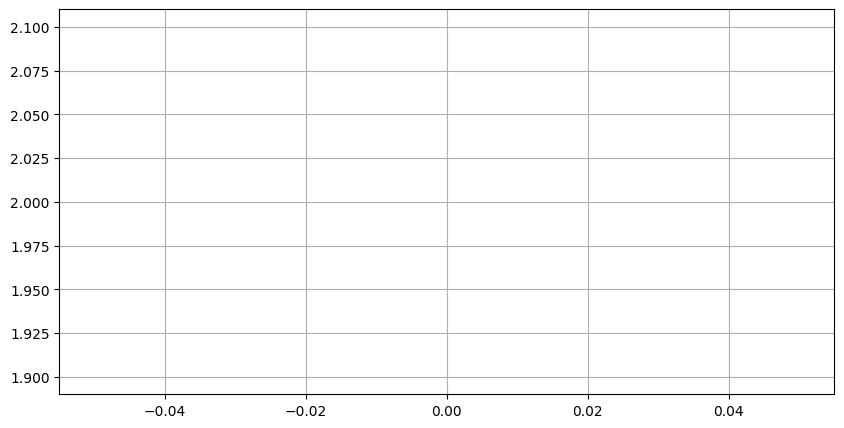

In [47]:
m = 1
n = 1000

plt.figure(figsize=(10, 5))
xs = np.linspace(0, 1, m)
ys = first_zero_index(m, n)
plt.plot(xs, ys)

plt.grid()
plt.show()